In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load csv file
df01 = pd.read_csv('/Users/steveyuan/Documents/github_files/Google-Data-Analytics_Case-Study-1/original_data/202201-divvy-tripdata.csv')
df02 = pd.read_csv('/Users/steveyuan/Documents/github_files/Google-Data-Analytics_Case-Study-1/original_data/202202-divvy-tripdata.csv')
df03 = pd.read_csv('/Users/steveyuan/Documents/github_files/Google-Data-Analytics_Case-Study-1/original_data/202203-divvy-tripdata.csv')
df04 = pd.read_csv('/Users/steveyuan/Documents/github_files/Google-Data-Analytics_Case-Study-1/original_data/202204-divvy-tripdata.csv')
df05 = pd.read_csv('/Users/steveyuan/Documents/github_files/Google-Data-Analytics_Case-Study-1/original_data/202205-divvy-tripdata.csv')
df06 = pd.read_csv('/Users/steveyuan/Documents/github_files/Google-Data-Analytics_Case-Study-1/original_data/202206-divvy-tripdata.csv')
df07 = pd.read_csv('/Users/steveyuan/Documents/github_files/Google-Data-Analytics_Case-Study-1/original_data/202207-divvy-tripdata.csv')
df08 = pd.read_csv('/Users/steveyuan/Documents/github_files/Google-Data-Analytics_Case-Study-1/original_data/202208-divvy-tripdata.csv')
df09 = pd.read_csv('/Users/steveyuan/Documents/github_files/Google-Data-Analytics_Case-Study-1/original_data/202209-divvy-tripdata.csv')
df10 = pd.read_csv('/Users/steveyuan/Documents/github_files/Google-Data-Analytics_Case-Study-1/original_data/202210-divvy-tripdata.csv')
df11 = pd.read_csv('/Users/steveyuan/Documents/github_files/Google-Data-Analytics_Case-Study-1/original_data/202211-divvy-tripdata.csv')
df12 = pd.read_csv('/Users/steveyuan/Documents/github_files/Google-Data-Analytics_Case-Study-1/original_data/202212-divvy-tripdata.csv')

In [6]:
print(df01.head)

<bound method NDFrame.head of                  ride_id customer_type      bike_type  start_hour week_day  \
0       C2F7DD78E82EC875        casual  electric_bike          11      Thu   
1       A6CF8980A652D272        casual  electric_bike           8      Mon   
2       BD0F91DFF741C66D        member   classic_bike           4      Tue   
3       CBB80ED419105406        casual   classic_bike           0      Tue   
4       DDC963BFDDA51EEA        member   classic_bike           1      Thu   
...                  ...           ...            ...         ...      ...   
103765  8788DA3EDE8FD8AB        casual  electric_bike          12      Tue   
103766  C6C3B64FDC827D8C        casual  electric_bike          11      Thu   
103767  CA281AE7D8B06F5A        casual  electric_bike          16      Mon   
103768  44E348991862319B        casual  electric_bike          13      Wed   
103769  E477C594A182AE58        casual  electric_bike          17      Thu   

       month  year       start_ti

In [7]:
print(df01.dtypes)

ride_id          object
customer_type    object
bike_type        object
start_hour        int64
week_day         object
month            object
year              int64
start_time       object
end_time         object
riding_time       int64
dtype: object


In [8]:
print(df01.shape)

(103770, 10)


In [9]:
print(df01.columns)

Index(['ride_id', 'customer_type', 'bike_type', 'start_hour', 'week_day',
       'month', 'year', 'start_time', 'end_time', 'riding_time'],
      dtype='object')


In [10]:
df = pd.concat([df01, df02, df03, df04, df05, df06, df07, 
                df08, df09, df10, df11, df12], ignore_index= True)
print(df.shape)

(5667717, 10)


In [11]:
print(df.head)

<bound method NDFrame.head of                   ride_id customer_type      bike_type  start_hour week_day  \
0        C2F7DD78E82EC875        casual  electric_bike          11      Thu   
1        A6CF8980A652D272        casual  electric_bike           8      Mon   
2        BD0F91DFF741C66D        member   classic_bike           4      Tue   
3        CBB80ED419105406        casual   classic_bike           0      Tue   
4        DDC963BFDDA51EEA        member   classic_bike           1      Thu   
...                   ...           ...            ...         ...      ...   
5667712  43ABEE85B6E15DCA        member   classic_bike           6      Mon   
5667713  F041C89A3D1F0270        member  electric_bike          17      Wed   
5667714  A2BECB88430BE156        member   classic_bike          16      Thu   
5667715  37B392960E566F58        member   classic_bike           9      Wed   
5667716  2DD1587210BA45AE        casual   classic_bike           0      Fri   

        month  year  

## Data Validation

In [12]:
# Check NaN value
nan_counts = df.isna().sum()
print(nan_counts)

ride_id          0
customer_type    0
bike_type        0
start_hour       0
week_day         0
month            0
year             0
start_time       0
end_time         0
riding_time      0
dtype: int64


In [14]:
# Check if the riding time is abnormal
# check riding time < 0
has_negative_riding_times = (df['riding_time'] < 0).any()    
print('Negative_riding_times:', has_negative_riding_times)

Index(['ride_id', 'customer_type', 'bike_type', 'start_hour', 'week_day',
       'month', 'year', 'start_time', 'end_time', 'riding_time'],
      dtype='object')
Negative_riding_times: True


In [16]:
# check riding time > 1440
has_excessive_riding_times = (df['riding_time'] > 1440).any()    
print('Excessive_riding_times:', has_excessive_riding_times)

Excessive_riding_times: True


In [17]:
# Remove the data with riding time < 0 or riding time > 1440
df_cleaned = df[(df['riding_time'] >= 0) & (df['riding_time'] <= 1440)]
print(df_cleaned.shape)

(5662256, 10)


## Data Analysis

### Distribution of Rides by Customer Type

In [20]:
# calculate the unique customer number
customer_counts = df['customer_type'].value_counts()
print(customer_counts)

member    3345685
casual    2322032
Name: customer_type, dtype: int64


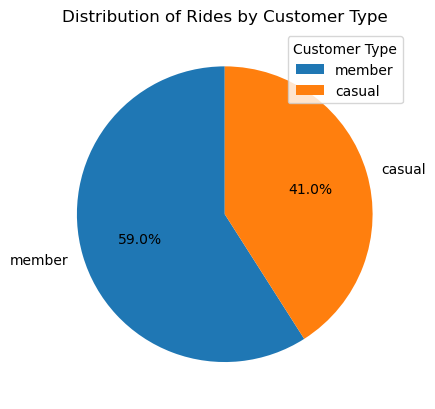

<Figure size 1000x600 with 0 Axes>

In [24]:
labels = customer_counts.index
sizes = customer_counts.values

# Draw Pie Chart
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 90)

# Set colors
colors = ['#1f77b4', '#d62728']

# Set Figure Size
plt.figure(figsize=(10, 6))

# Add Legend
ax.legend(labels, title = 'Customer Type')

# Add Title
ax.set_title('Distribution of Rides by Customer Type')

# Show pia chart
plt.show()

### Hourly Distribution of Rides by Customer Type

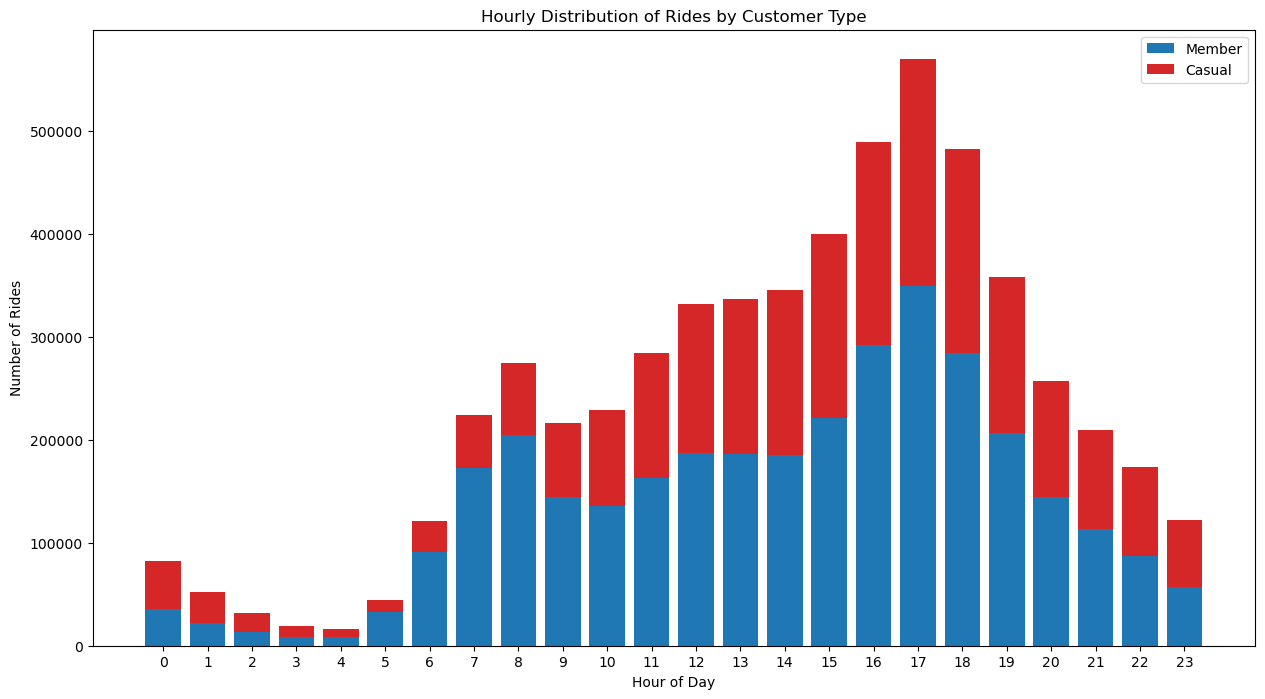

In [26]:
# count number by hourly and customer type
hourly_customer_counts = df.groupby(['start_hour', 'customer_type']).size().unstack(fill_value= 0)

# sorted hour from 0 to 23
hourly_customer_counts = hourly_customer_counts.sort_index()

hours = hourly_customer_counts.index
casual_counts = hourly_customer_counts['casual']
member_counts = hourly_customer_counts['member']

# Set figure size
plt.figure(figsize = (15, 8))

# Draw bar chart
# Draw member type first
plt.bar(hours, member_counts, label = 'Member', color = '#1f77b4')
# Draw casual type 
plt.bar(hours, casual_counts, bottom= member_counts, label= 'Casual', color = '#d62728')

# Add legend
plt.legend()

# Add Title and Axis labels
plt.title('Hourly Distribution of Rides by Customer Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')

plt.xticks(hours)

plt.show()